### Soil Clustering: significance testing

In [19]:
%matplotlib inline



basepath='/Users/kelly/CCCma/Projects/SoilClustering/DATA/'

gfname=basepath+'gridmean_annual.nc' # gridmean soil data (the control?)
cfname=basepath+'cluster_annual.nc' # clustered soil data (test run)

field = 'ANNUALGPP_GA'


gridm = cnc.getNCvar(gfname,field)
clusterm = cnc.getNCvar(cfname,field)
lat = cnc.getNCvar(gfname,'lat')
lon = cnc.getNCvar(gfname,'lon')

xx = np.arange(1850,1850+gridm.shape[0])


<class 'numpy.ma.core.MaskedArray'>
(165, 64, 128)
(165, 64, 128)


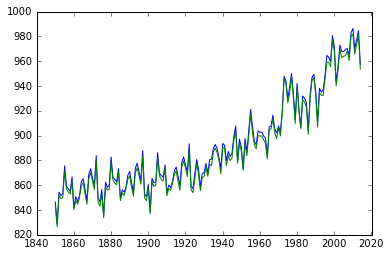

In [25]:
import cccmautils as cutl

cutl=reload(cutl)

print type(gridm)
print gridm.shape
print clusterm.shape

gridmgm = cutl.global_mean_areawgted3d(gridm,lat,lon,model=None)
clustermgm = cutl.global_mean_areawgted3d(clusterm,lat,lon,model=None)

plt.figure()
plt.plot(xx,gridmgm)
plt.plot(xx,clustermgm)

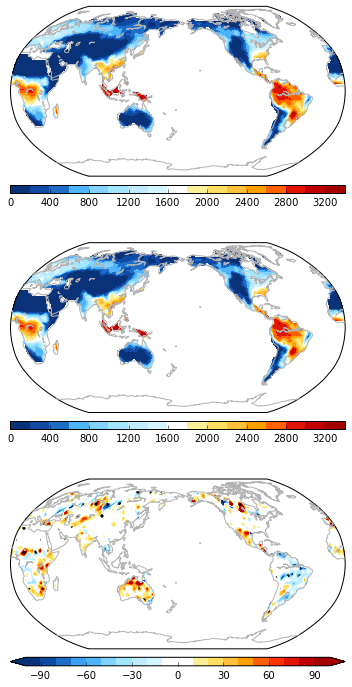

In [78]:
import scipy as sp
import scipy.stats

numyrs=150

pert=clusterm[-numyrs:,...] # get last numyrs years
ctl=gridm[-numyrs:,...]
#_,pvals = cutl.ttest_ind(clusterm[-20:,...], gridm[-20:,...],axis=0) # WRONG b/c of masked data
_,pvals = sp.stats.mstats.ttest_ind(pert,ctl,axis=0) # this func can handle masked arrays. yeah!



fig,axs = plt.subplots(3,1,figsize=(6,12))
ax=axs[0]
ret = cplt.kemmap(ctl.mean(axis=0), lat, lon,axis=ax, title='Grid mean')

ax=axs[1]
ret = cplt.kemmap(pert.mean(axis=0), lat, lon, axis=ax, title='Clustered')

ax=axs[2]
bm,pc = cplt.kemmap(pert.mean(axis=0)-ctl.mean(axis=0),
                  lat, lon,axis=ax,cmin=-100,cmax=100, title='Clustered-Grid mean')

# hatching in inline figs is barely visible. Not sure how to fix. Looks better in saved png.
# contours in this case are ugly imho
cplt.addtsigm(bm,pvals,lat,lon,sigtype='hatch') # add significance markings (hatch or contour)

### plot the absolute difference (clustered - grid mean)

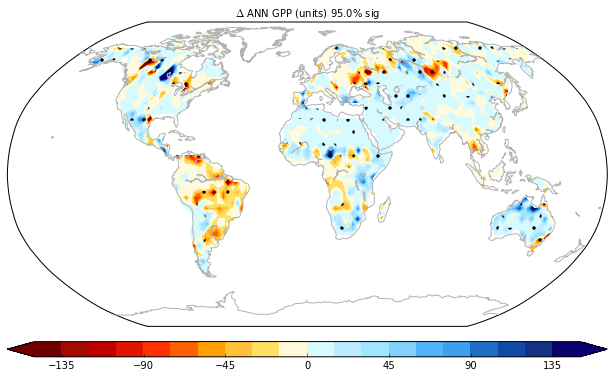

In [81]:
printtofile=True

siglevel = 0.05 # 0.1   # 95% significance level
sigtype='hatch' # 'contour'

fig,ax = plt.subplots(1,1,figsize=(12,6))
bm,pc = cplt.kemmap(pert.mean(axis=0)-ctl.mean(axis=0),
                    lat, lon,axis=ax,cmin=-150,cmax=150,ptype='sqshift',
                    cmap='red2blue_20',
                    title='$\Delta$ ANN GPP (units) ' + str((1-siglevel)*100) + '% sig')

cplt.addtsigm(bm,pvals,lat,lon,sigtype=sigtype,siglevel=siglevel)

if printtofile:
    plt.savefig('ANNUALGPP_cluster_v_gridmean_ttest' + str((1-siglevel)*100) + sigtype+'_150yr.pdf')
    plt.savefig('ANNUALGPP_cluster_v_gridmean_ttest' + str((1-siglevel)*100) + sigtype+'_150yr.png',dpi=300)



### plot the percent difference

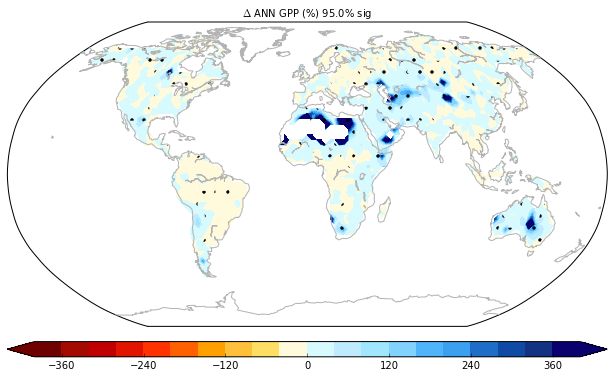

In [82]:

siglevel = 0.05 # 0.1
sigtype='hatch'

fig,ax = plt.subplots(1,1,figsize=(12,6))
bm,pc = cplt.kemmap((pert.mean(axis=0)-ctl.mean(axis=0))/ctl.mean(axis=0)*100,
                    lat, lon,axis=ax,cmin=-400,cmax=400,ptype='sqshift',
                    cmap='red2blue_20',
                    title='$\Delta$ ANN GPP (%) ' + str((1-siglevel)*100) + '% sig')

cplt.addtsigm(bm,pvals,lat,lon,sigtype=sigtype,siglevel=siglevel)

if printtofile:
    plt.savefig('ANNUALGPP_cluster_v_gridmean_ttest' + str((1-siglevel)*100) + sigtype+'pct_150yr.pdf')
    plt.savefig('ANNUALGPP_cluster_v_gridmean_ttest' + str((1-siglevel)*100) + sigtype+'pct_150yr.png',dpi=300)




### Try a different projection to focus on key regions of GPP change

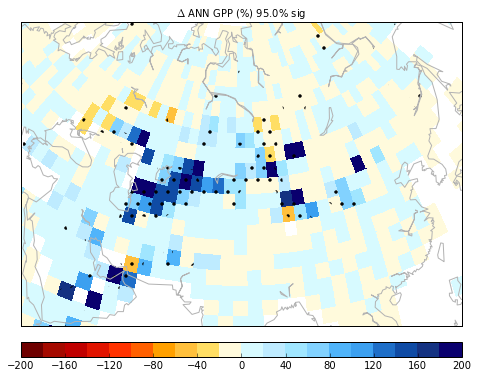

In [77]:
siglevel = 0.05 # 0.1
sigtype='hatch'

fig,ax = plt.subplots(1,1,figsize=(12,6))
bm,pc = cplt.kemmap((pert.mean(axis=0)-ctl.mean(axis=0))/ctl.mean(axis=0)*100,
                    lat, lon,axis=ax,cmin=-200,cmax=200,ptype='ealamb',
                    cmap='red2blue_20',
                    title='$\Delta$ ANN GPP (%) ' + str((1-siglevel)*100) + '% sig')

cplt.addtsigm(bm,pvals,lat,lon,sigtype=sigtype,siglevel=siglevel)

#plt.savefig('ANNUALGPP_cluster_v_gridmean_ttest' + str((1-siglevel)*100) + sigtype+'pct.pdf')
#plt.savefig('ANNUALGPP_cluster_v_gridmean_ttest' + str((1-siglevel)*100) + sigtype+'pct.png',dpi=300)



In [46]:
?cplt.addtsigm